# David Flores

# Introduction

Newton's method - an iterative method to find convergence to the roots of a particular function. 

$\cdot$ If we are given a function $f(x)$, then we choose an initial guess for the root $x_0$.

$\cdot$ Next, we would compute the following guess by: $$x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)},$$
where $f'(x)$ is the derivative of $f(x)$.

$\cdot$ Lastly, to find what root a point converges to, we would stop computing the next guess once: $$\mid x_{k+1}-x_k\mid < tol$$

Newton's method is known for having a faster convergence to roots compared to some other iterative methods such as the Bisection and Secant methods. Therefore, in this project we will focus on the Newton's method to find the convergence to the roots of three particular functions. 

These functions we will be working with are:
$$ f(x) = x^3 - 7x^2 + 12x \\ f(z) = z^3 - 1 \\ f(z) = z^n - 1 $$ 

Each of these functions will be used for the 3 main parts in our project respectively, and we will see some plots that will show what the convergence looks like for each root in each function.

# Code and Code Breakdown

##### Before we get started, we should import the following libraries to use for our code:

In [99]:
import numpy as np
import math as m
import matplotlib.pyplot as plt

##### Each of these will allow us to use certain functions from these libraries where necessary.

### Part 1- Defining newton and function 1: $f(x) = x^3 - 7x^2 + 12x$

We want to define a function called "newton" that will take three parameters: x0, f, fp. These parameters will be used in the function "newton" to compute the next iteration for one interation. We will use the equation in step 2 from the introduction to calculate that next iteration.

In [40]:
def newton(x0, f, fp):     #define newton function with its three parameters
    x1 = x0 - f(x0)/fp(x0) #equation from step 2
    return x1

Now that we have defined our newton function that calculates the next iteration, we want to manually define our first function that we will be working with: $$f(x) = x^3 - 7x^2 + 12x$$

If we factor this out by hand, we know that we should get the roots 0, 3, and 4. Which means that on our plot, each point we used as an initial guess should converge to 0, 3, or 4.
Newton's method involves the derivative of the original function that we are working with as well: $$f(x) = 3x^2 - 14x + 12$$

Therefore, we have to define a function for the derivative too and we will define these as f(x) for the original function, and fp(x) for the derivative.

In [100]:
def f(x):
    return x**3 - 7*x**2 + 12*x #original function

def fp(x):
    return 3*x**2 - 14*x + 12   #derivative of original function


So we have our defined newton function, and the defined functions to calculate the next iteration.
Now, we should define another function called "myfun", which will take two parameters: x and tol, where x is the points of our initial guess and tol is the tolerance that we set to find out where that particular point is converging.

In [101]:
def myfun(x,tol):     
    count = 0         #initiate a count
    newtonList = []   #creates an empty list where we will add the points that have been converged to (0,3,4)
    for x0 in x:      #starts for loop that goes through all points in parameter x
        while abs(x0-newton(x0,f,fp)) >= tol:  #starts while loop to check where tolerance is passed, this shows convergence
            x1 = f(x0) / fp(x0)   #set x1 = the step
            x0 -= x1              #set our new guess "x0" equal to our previous guess minus the step
                                  #we do this until tolerance is passed
        newtonList.append(x0)     #once that tolerance is reached, we have x0 which is the root converged to
        count += 1                #add 1 to count to continue our while loop
    return newtonList

This function "myfun" will return a list of all the converged roots. This means that for every point in the parameter x, that point converges to one of the roots for our function $f(x) = x^3 - 7x^2 + 12x$.
Since the parameter x is multiple points, we can set a domain for it with certain amount of points such as 100.

In [125]:
x = np.linspace(-1,6,100)

With this x value parameter, we should get 100 points from -1 to 7, where each point is equal to a f(x) value 0, 3, or 4 since these are the roots that can be converged to for this function.
We will see by plotting that this does indeed happen.

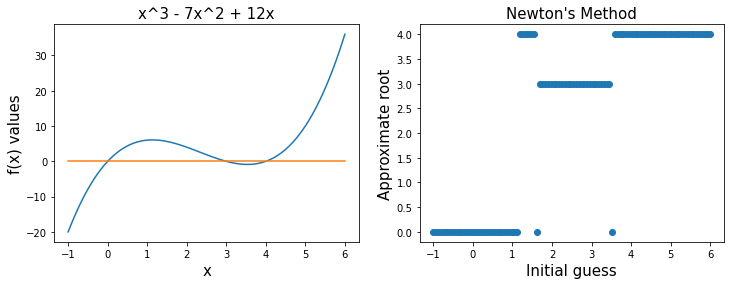

In [129]:
plt.figure(figsize=(12,4))    #setting a size for our figures

plt.subplot(1,2,1)            #subplot 1 out of 2
plt.plot(x,f(x))              #plot f(x)
plt.plot(x,np.linspace(0,0,100))
plt.title("x^3 - 7x^2 + 12x",fontsize= 15) #setting title and x and y labels
plt.xlabel("x", fontsize= 15)
plt.ylabel("f(x) values",fontsize= 15);

plt.subplot(1,2,2)            #subplot 2 out of 2
plt.scatter(x,myfun(x,1e-6))  #scatter plot of the list returned by myfun
plt.title("Newton's Method",fontsize= 15)
plt.xlabel("Initial guess",fontsize=15)
plt.ylabel("Approximate root",fontsize= 15);

We see on the left subplot the original function and where the function meets the y = 0 or x axis. Those are the roots, the function hits the x axis at x values 0, 3, and 4. We also notice on the right subplot all 100 points from -1 to 6, with equal spacing, have converged to either 0, 3, or 4. 

### Part 2- Defining find_roots and function 2: $f(z) = z^3 - 1$

In this second part, we will look at the second function from our introduction as stated above. We create our big function called "find_roots", but before we do that, we will create a function called "domain" that will take a parameter xs and set a domain for our second function f(z) to find the convergence for certain points. This function will return a value "z" that is an array containing the value of the square root of xs points from -1 to 1 with equal steps. This is to create a 2-dimensioanl domain in the form: $$a + bj,$$
where b*j is the complex value.

In [130]:
def domain(xs):                
    rowLen = int(m.sqrt(xs))      #define a variable to find the sqrt of the input
    r = np.linspace(-1,1,rowLen)  #variable r is the real numbers of the domain
    i = np.linspace(complex(0,-1),complex(0,1),rowLen) #variable i is the imaginary numbers of the domain
    rr,ii = np.meshgrid(r,i)      #use the function meshgrid to create the grid of our plot
    z=rr+ii                       #set z (domain) = to rr+ii to have the 2-dimensional domain form "a+bj"
    return z


Now that we have our domain we can create our main function "find_roots". This function will take four parameters: n (order#), domain (which is a callback to our domain function), niter (n iteratoins), and tol (tolerance we decide to find convergence).
This function will return an array of equal length and width called ccode. This array will contain the roots that have been converged to using the newton function we created earlier with parameter 'niter' iterations.
The function that we are dealing with ($f(z) = z^3 - 1$) does not have nice roots like the function from part 1. However, just like part 1, we will define the functions f(z) and fp(z) just like f(x) and fp(x) but using this function instead. This will help us later on using the general function f(z) with order n instead of using specifically an order of n = 3 (which we will be using in this part).

In [139]:
def find_roots(n,domain,niter,tol):  #define find_roots with its four parameters as discussed
    def f(z):                        #define f(z)
        return z**n - 1

    def fp(z):                       #define fp(z), the derivative of f(z)
        return n*z**(n-1)
    
    rowLen = int(m.sqrt(niter))      #define variable to find sqrt of the input 'niter'
    roots = [complex(np.cos(2*m.pi*k/n),np.sin(2*m.pi*k/n)) for k in range(n)] #calculate the roots of f(z) of order n
    print(roots)   #print the roots that we calculate to see what we get as the roots for f(z) with order n
             
    newtonComplex = []              #create empty list to contain all converged points
    for x0 in domain:               #start for loop to go through the points in our domain input
        for i in range(niter):      #start for loop for each point in domain to go through niter iterations of newton function
            x0 = newton(x0, f, fp)  #callback newton function to set x0 = converged points
        newtonComplex.append(x0)    #add x0 to newtonComplex list 
                                    #which will contain the roots that each point in domain converged to

    ccode = np.zeros((rowLen,rowLen)) #define variable ccode, which is an array of zeros with equal length and width

    points = np.array(newtonComplex).ravel() #set points equal to a simple array of newtonComplex
    truthTables = []         #set empty list
    for i in range(len(roots)): #start for loop fo the number of roots we have (depending on order n)
        truthTables.append((np.abs(points - roots[i]) < tol).reshape(rowLen,rowLen)) 
        #add truth values of where each point converged to (1,2,...,n) to truthTables
    
    for y in range(int(m.sqrt(niter))): 
        #creating for loops to set every indece of ccode equal to either 1,2,...,n 
        #depending on where that point converges to and how many roots there are (order n)
        for x in range(int(m.sqrt(niter))):  
            for i in range(len(roots)):      
                if (truthTables[i][y][x]):   
                    ccode[y][x] = i + 1
    return ccode
    

We have our find_roots function, which will help us find to what root (of order n) every point, in the domain of 2-dimensions, converges to. So for this particular part, we are interested in the function: $f(z) = z^3 - 1$, so we should have an n value of 3. We also want to use a large domain, maybe 10000, 100 iterations and a tolerance of 0.01. We will plot this function using these parameters to see what roots the points converge to. Maybe we will find a pattern, the function below will plot find_roots to see convergence.

[(1+0j), (-0.4999999999999998+0.8660254037844387j), (-0.5000000000000004-0.8660254037844385j)]


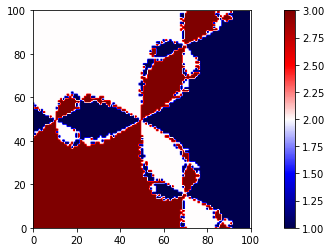

In [142]:
ccode1 = find_roots(3,domain(10000),10000,0.01) #set variable to call find_roots function

plt.figure(figsize=(12,4))        #set figure size

plt.imshow(ccode1,cmap='seismic') #use imshow function with seismic colormap to show the pattern of the return value from find_roots 
plt.colorbar()                    #show colorbar
plt.axis([0, 100, 0, 100]);       #set axes size to specify where we want to look exactly


This is the plot of the roots that are converged to for the function $f(z) = z^3 - 1$, and from this output we can see what those roots are. This is the work of Newton's method. We can see a flower like shape and we notice how weird these points converge to the roots. Each root has a large area where every point converges to it, along with some areas the switch between roots. Maybe we can have a closer look, the function below will just zoom in to see the interesting areas where points switch convergence.

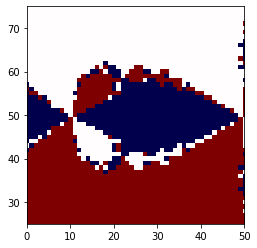

In [143]:
plt.imshow(ccode1,cmap='seismic')
plt.axis([0, 50, 25, 75]);        #new axes for zoom in

Here we can see a closer view or zoom in of one of the areas where points switch convergence.

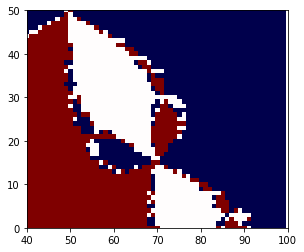

In [134]:
plt.imshow(ccode1,cmap='seismic')
plt.axis([40, 100, 0, 50]);

Here is the second area.

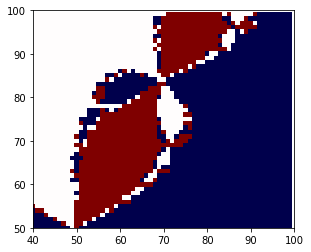

In [135]:
plt.imshow(ccode1,cmap='seismic')
plt.axis([40, 100, 50, 100]);

And above is the last area.

### Part 3- Function 3: $f(z) = z^n - 1$ (using different n values)

Part 3 deals with the third function from the introduction. It is basically the function used in part 2 except with a different order of n. This means that when we callback the function "find_roots" we will use a different value of n to have n number of roots instead of 3. First we should try n = 4. The code below will plot the function find_roots and we will observe the areas like we did in part 2.

[(1+0j), (6.123233995736766e-17+1j), (-1+1.2246467991473532e-16j), (-1.8369701987210297e-16-1j)]


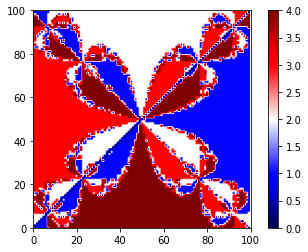

In [136]:
ccode2 = find_roots(4,domain(10000),10000,0.01) #set new variable callingback find_roots with new n specifically n = 4

plt.imshow(ccode2,cmap='seismic')
plt.colorbar()
plt.axis([0, 100, 0, 100]);

Now lets zoom in on a few areas of this plot.

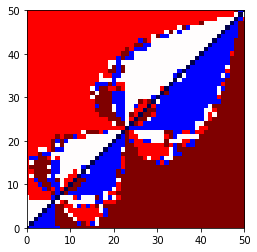

In [75]:
plt.imshow(ccode2,cmap='seismic')
plt.axis([0, 50, 0, 50]);

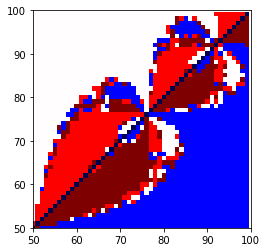

In [76]:
plt.imshow(ccode2,cmap='seismic')
plt.axis([50, 100, 50, 100]);

Now lets try n = 6.

[(1+0j), (0.5000000000000001+0.8660254037844386j), (-0.4999999999999998+0.8660254037844387j), (-1+1.2246467991473532e-16j), (-0.5000000000000004-0.8660254037844385j), (0.5000000000000001-0.8660254037844386j)]


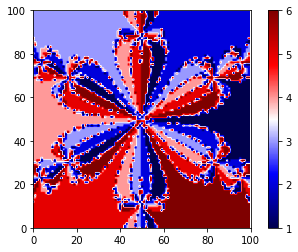

In [90]:
ccode3 = find_roots(6,domain(10000),10000,0.01)

plt.imshow(ccode3,cmap='seismic')
plt.colorbar()
plt.axis([0, 100, 0, 100]);

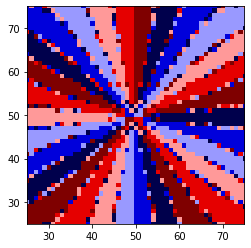

In [87]:
plt.imshow(ccode3,cmap='seismic')
plt.axis([25, 75, 25, 75]);

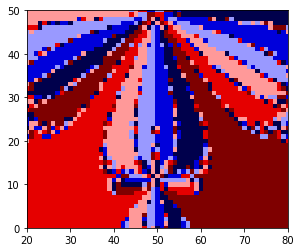

In [91]:
plt.imshow(ccode3,cmap='seismic')
plt.axis([20, 80, 0, 50]);

# Conclusion

Using Newton's method makes it easier to find the convergence of roots for points where calculating the roots are not very nice. We used the function $f(z) = z^3 - 1$ to show where convergence can be seen on a plot using the imshow function. From parts 2 and 3 we can conclude that for function $f(z) = z^n - 1$. The number of roots creates a different pattern on every plot. Almost as if the more roots there are, the more pedals there are on the flower like shape figure on each part.